<a href="https://colab.research.google.com/github/pmalu9211/ML/blob/main/3_Linear_regression_with_multiple_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to implement linear regression for muliple features, rather then just one which we had last time.

---

Here we have n number of features (considering house price prediction model, we have many features like, sq arear, bhk and all)
and we have m number of data  


---



# 𝐘 = θₒ + Σ θᵢ𝐗ᵢ    from i = 1 to n  
 we can add extra column to 𝐗 i.e, and dummy coloumn of all 1

 so now the input matrix is **m x n+1**

 theta is also n+1 and 𝐗 is n+1

---

 in order to take get the predicted value i.e, hypothesis we have

 # θᵀ  𝐗
 as theta is just an matrix with 1 row and n + 1 column, we can multiply the matrices to get the hypothesis, and this is called hypothesis fuction

# Data Generation

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [112]:
n_features = 10
X,y = make_regression(n_samples = 500, n_features = 10, n_informative = 5, noise = 20, random_state = 0)
print(X.shape, y.shape)

(500, 10) (500,)


In [113]:
# Normalize the data

def normalize(X):
  return (X-(X.mean(axis = 0)))/X.std(axis = 0)

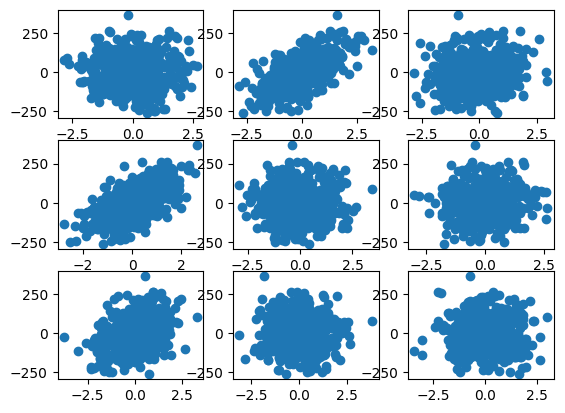

In [114]:
#visulaization

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.scatter(X[:,i],y)
plt.show()

In [115]:
# spliting the data training and testing
Xtrain,Xtest, ytrain, ytest = train_test_split(X,y,shuffle = False, random_state=0)
print(Xtrain.shape)
print(ytrain.shape)

(375, 10)
(375,)


[5801.205128450463, 4711.452213254758, 3838.053824931414, 3137.299783835954, 2574.45706924421, 2121.8974732268953, 1757.621412821155, 1464.092957878623, 1227.3195690187322, 1036.124430481932, 881.570503552606, 756.5042140753952, 655.1935634365815, 573.0408367716116, 506.35430222517266, 452.1666054854004, 408.09016291743626, 372.20189908939716, 342.951280978226, 319.0868658782691, 299.5975766342086, 283.6657038600621, 270.6292553544791, 259.9517632839264, 251.19804755956835, 244.0147409017191, 238.11462442730678, 233.2640156213749, 229.27260381456233, 225.98525009395928, 223.2753654741863, 221.03955831610583, 219.193303482535, 217.66743478871544, 216.4053014915168, 215.3604608857832, 214.49480414023049, 213.7770325793038, 213.18141771024807, 212.68679120819868, 212.27572144431232, 211.93384148085465, 211.64930016766854, 211.4123133796334, 211.21479679257757, 211.0500651118389, 210.91258550826606, 210.79777531303162, 210.7018358810885, 210.62161603840153, 210.5544997484459, 210.498313623

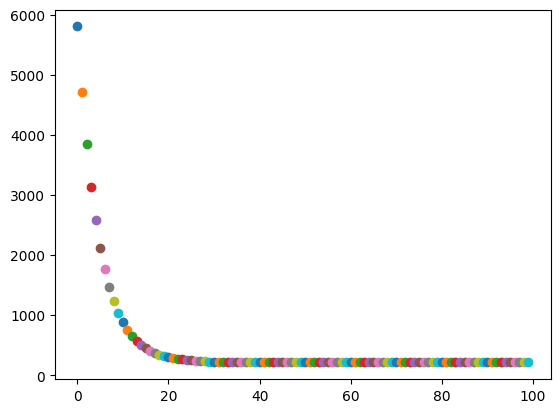

In [116]:
#Modeling linear regression with multiple features

def preProcessing(X,n_features):  #theta we have has theta0 but we don't have X0 thats why we are adding an dummy X
  if(X.shape[1] == n_features):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
  return X

def hypothesis(X,theta):
  return np.dot(X,theta);

def loss(X,y,theta):
  yp = hypothesis(X,theta);
  error = np.sum((y-yp)**2);
  return (error/(2*yp.shape[0]))

def gradient(X,y,theta):
  yp = hypothesis(X,theta)
  grad = np.dot(X.T, (yp-y)) #we get the value for each theta by doing this
  m = X.shape[0]
  return grad/m

def training(Xtrain, ytrain, lr = 0.1, itrn = 100):
  theta = np.random.randn(Xtrain.shape[1])
  err_list = []
  for i in range(itrn):
    err = loss(Xtrain, ytrain,theta)
    err_list.append(err)
    theta = theta - lr*gradient(Xtrain,ytrain,theta)
    plt.scatter(i,err)
  print(err_list)
  return theta

Xtrain = preProcessing(Xtrain, n_features)
Xtest = preProcessing(Xtest, n_features)

theta = training(Xtrain,ytrain, lr = 0.1, itrn = 100)
print(theta.shape)


In [117]:
#Evalalution by r2

def evalu(y, ypred):
  return (1- (np.sum((ypred-y)**2))/np.sum((ypred-y.mean())**2))

ypred = hypothesis(Xtest, theta)

evalu(ytest,ypred)

0.959359237125494

# Training the model with inbuild library

In [118]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(Xtrain,ytrain)
yp = model.predict(Xtest)

model.score(Xtest,ytest)
theta0 = model.intercept_
modeltheta = model.coef_
print(theta0, modeltheta)
print(theta)

-0.8137155801759208 [ 0.         -0.53082774 61.197087   10.99181599 68.01766368 -0.79582621
 -0.44895121 41.34915332  0.64784929  0.77231911 23.58866784]
[-0.81451193 -0.53363713 61.19785476 10.99181121 68.00703805 -0.79353625
 -0.4426953  41.34411526  0.64828694  0.77717964 23.59040355]
